Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [0]:
#get data
!wget https://github.com/toannv97/DefC/raw/master/Week%208/train.zip
!unzip train.zip

In [0]:
# Import libraries
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read csv file and take a look at it
train = pd.read_csv("/content/train.csv")
train.sample(15)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
361663,903534,0,0,3,4,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.9,0.4,1.052378,7,1,0,0,1,1,1,1,2,1,85,3,0.374166,0.696138,0.343511,2.645751,0.5,0.8,0.7,2,0,6,3,9,2,9,1,0,2,9,0,1,0,1,0,0
567498,1418824,0,5,1,9,0,0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.6,0.2,0.615427,11,1,1,0,1,1,1,1,2,1,38,3,0.316228,0.740761,0.299166,3.316625,0.9,0.5,0.7,1,2,8,4,8,1,8,5,1,5,8,0,0,0,0,0,0
551340,1378020,0,2,1,5,1,1,0,0,1,0,0,0,0,0,0,6,1,0,0,0.7,0.4,0.770146,7,1,-1,0,-1,15,1,1,2,1,5,2,0.400000,0.682121,0.392683,1.732051,0.6,0.3,0.6,2,3,9,3,11,2,10,2,7,3,5,0,0,0,0,0,0
588792,1471819,0,1,1,2,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.6,0.4,0.684197,3,0,-1,0,-1,11,1,0,0,1,104,3,0.400000,1.026891,0.376165,3.605551,0.7,0.3,0.8,4,1,8,6,8,1,10,4,3,3,5,0,1,1,0,0,0
515933,1289081,0,6,1,7,0,0,1,0,0,0,0,0,0,0,0,8,0,1,0,0.4,0.0,0.881051,5,1,1,0,1,1,0,1,2,1,104,3,0.316070,0.523912,0.327109,1.414214,0.7,0.3,0.4,1,1,10,5,9,3,6,4,4,4,5,0,1,1,0,1,0
1304,3353,0,3,1,11,0,0,0,0,0,1,0,0,0,0,0,12,0,0,0,0.8,0.2,0.730154,10,1,-1,0,0,1,1,1,0,1,85,2,0.374166,0.928415,0.399625,3.605551,0.5,0.1,0.9,2,4,6,6,8,2,11,1,0,6,8,0,1,1,0,0,0
583565,1458705,1,1,2,0,1,-1,0,1,0,0,0,0,0,0,0,4,1,0,0,0.9,0.4,0.921954,7,1,0,0,0,1,-1,1,2,1,74,3,0.374166,0.673786,0.330303,2.828427,0.5,0.8,0.2,1,0,7,4,10,2,7,6,1,1,5,0,1,0,1,0,0
406304,1015516,0,0,2,6,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.0,0.0,1.000312,11,1,-1,2,-1,1,1,0,2,1,90,0,0.424264,1.012025,0.429535,3.741657,0.9,0.0,0.5,2,1,9,1,9,4,8,5,1,2,7,0,1,0,0,1,0
320446,800796,0,1,2,2,1,0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.8,0.3,0.908639,9,1,1,1,0,3,1,1,2,1,59,3,0.316228,0.742024,0.309677,3.464102,0.7,0.2,0.8,3,1,7,2,5,2,8,9,2,5,3,0,1,1,0,0,0
332273,830218,0,3,1,6,0,0,1,0,0,0,0,0,1,0,1,5,0,1,0,0.9,0.4,0.735272,7,1,1,0,0,1,1,0,2,1,51,2,0.374166,0.901780,0.330757,3.605551,0.6,0.9,0.3,1,2,7,4,9,1,11,5,1,2,8,0,0,1,1,0,0


In [4]:
# Taking a look at how many rows and columns the train dataset contains
(rows, columns) = train.shape
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [5]:
# Your code here
train.isnull().values.any()

False

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [0]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

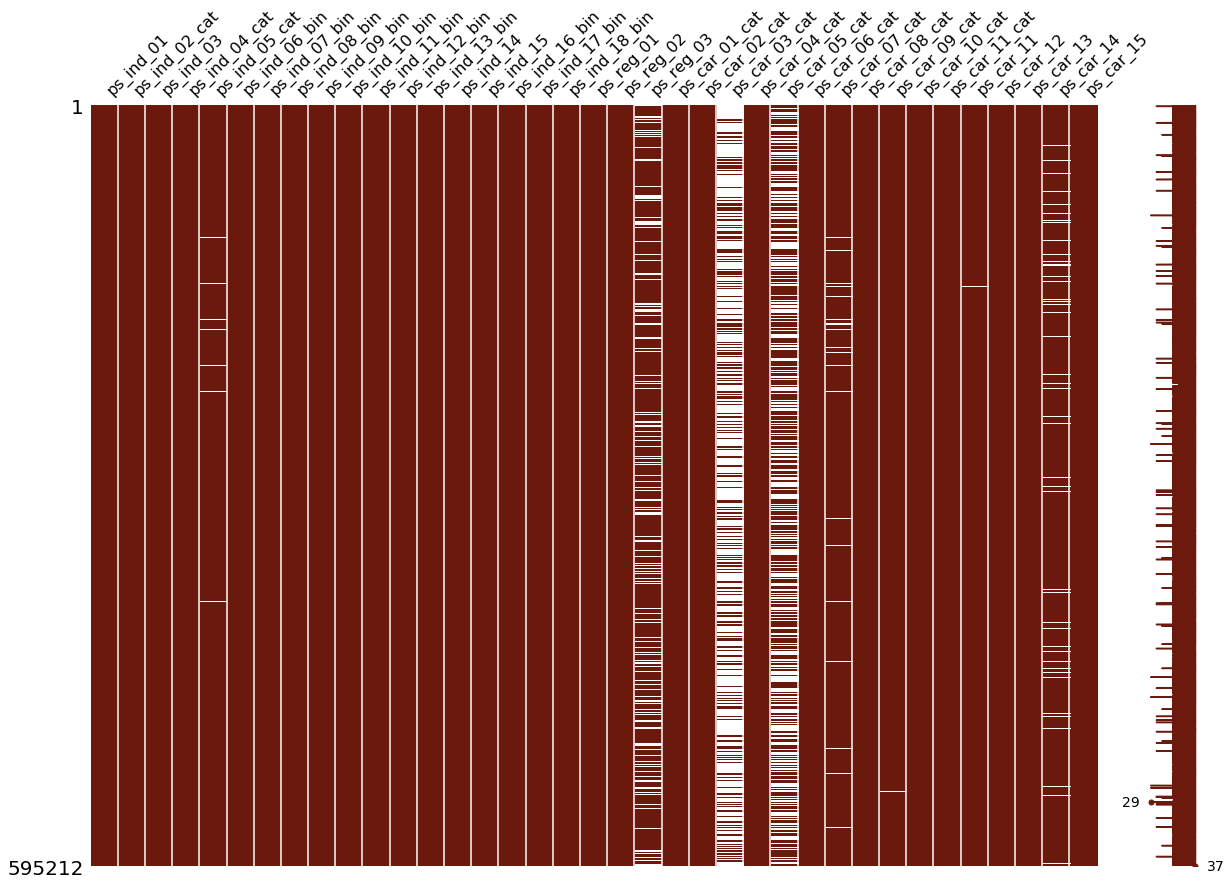

In [7]:
# If you don't have "Missingno" package, use this command to install
# (Linux) conda install -c conda-forge missingno
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [8]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(train_copy)

Your selected dataframe has 59 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
ps_car_03_cat,411231,69.1
ps_car_05_cat,266551,44.8
ps_reg_03,107772,18.1
ps_car_14,42620,7.2
ps_car_07_cat,11489,1.9
ps_ind_05_cat,5809,1.0
ps_car_09_cat,569,0.1
ps_ind_02_cat,216,0.0
ps_car_01_cat,107,0.0
ps_ind_04_cat,83,0.0


#### Target variable inspection

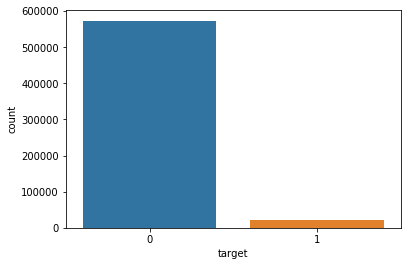

In [9]:
# Using countplot to represent target
# Your code here
sns.countplot(x = "target", data = train_copy)

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [0]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

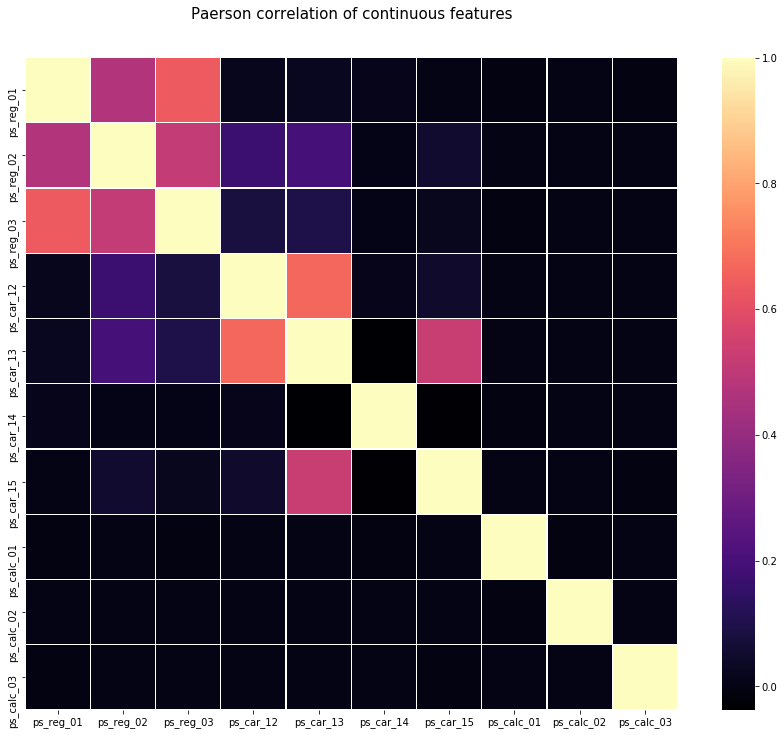

In [11]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

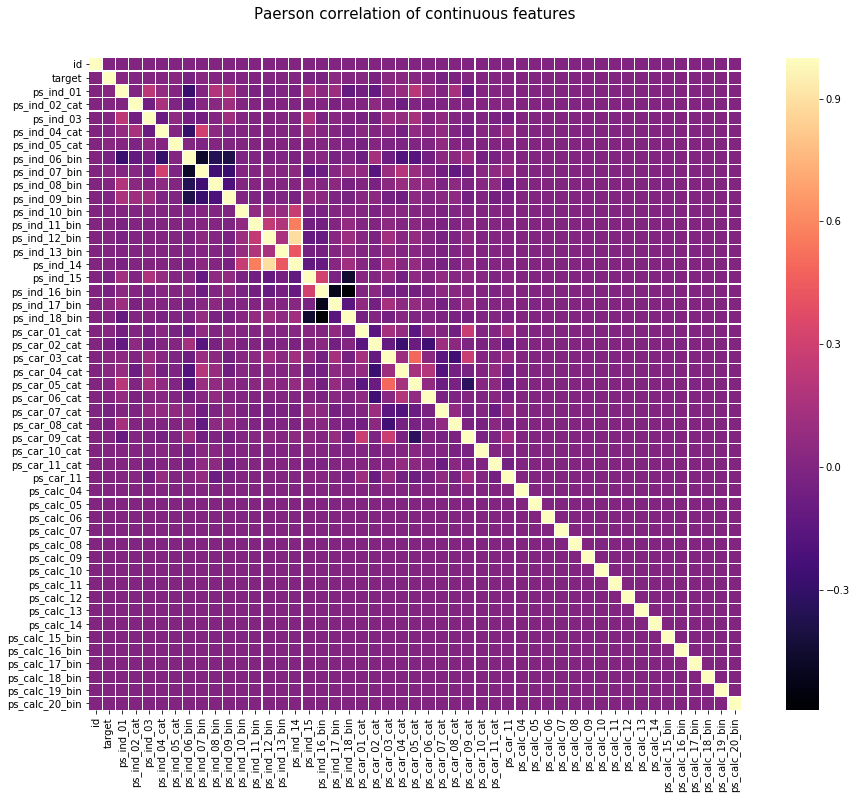

In [12]:
# Your code here
# Hint: correlation of train_int
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

#### Which features have negatively correlation?
Negatively correlated features : **Your answer here**

(ps_ind_06_bin, ps_ind_07_bin)

(ps_ind_17_bin, ps_ind_16_bin)

(ps_ind_18_bin, ps_ind_15)

(ps_ind_18_bin, ps_ind_16)



### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [0]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [14]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,360852,442223,497644,484917,594990,594205,589594,594648,201882,523143,503879,522342,221514,265356,424278,387469,503955
1,234360,152989,97568,110295,222,1007,5618,564,393330,72069,91333,72870,373698,329856,170934,207743,91257


In [0]:
# hint pandas plot.bar with stacked=True
# Your code here

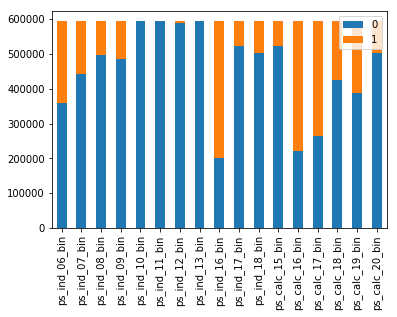

In [16]:
bin_value_counts.transpose().plot.bar( stacked=True)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [0]:
# Import train_test_split 
# Your code here
X = train.drop(labels="target", axis=1)
y = train["target"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

In [0]:
# Your code here

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

In [0]:
# Your code here


## 4. Modeling

In [23]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
# Import libraries and and create model
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()

models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]
# gnb.fit(X_train, y_train)

# y_pred = gnb.predict(X_test)
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.00      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 5. Evaluation Metrics

In [0]:
# Import confusion_matrix, classification_report
# Your code here

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y):
    # Your code here
    return 0

### Evaluate with Origin dataset

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    #estimator = evaluate_model(model, X_train, y_train)

    F = model.fit(X_train, y_train)
    
    y_pred = F.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # Evaluate model with X_test, y_test
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.00      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

[[172056      0]
 [  6508      0]]
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.05      0.07      0.06      6508

    accuracy                           0.92    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.92      0.93    178564

[[163710   8346]
 [  6059    449]]
Model: Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.33      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.65      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564

[[172052      4]
 [  6506      2]]
Model: Bernoulli NB


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.00      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

[[172056      0]
 [  6508      0]]
Model: Gaussian NB
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.24      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.60      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564

[[172014     42]
 [  6495     13]]


### Evaluate with *Undersampled* dataset

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    F = model.fit(X_resampled, y_resampled)
    y_pred = F.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.63      0.76    172056
           1       0.05      0.54      0.10      6508

    accuracy                           0.62    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.62      0.74    178564

[[107759  64297]
 [  2966   3542]]
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.53      0.68    172056
           1       0.04      0.52      0.07      6508

    accuracy                           0.53    178564
   macro avg       0.50      0.52      0.38    178564
weighted avg       0.93      0.53      0.66    178564

[[90690 81366]
 [ 3115  3393]]
Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      0.66      0.78    172056
           1       0.05      0.45      0.09      6508

    accuracy                           0.65    178564
   macro avg       0

### Evaluate with *Oversampled* dataset

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    F = model.fit(X_resampled, y_resampled)
    y_pred = F.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("=======================================")

Model: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.97      0.63      0.76    172056
           1       0.05      0.55      0.10      6508

    accuracy                           0.62    178564
   macro avg       0.51      0.59      0.43    178564
weighted avg       0.94      0.62      0.74    178564

[[107904  64152]
 [  2939   3569]]
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    172056
           1       0.04      0.04      0.04      6508

    accuracy                           0.93    178564
   macro avg       0.50      0.50      0.50    178564
weighted avg       0.93      0.93      0.93    178564

[[165295   6761]
 [  6220    288]]
Model: Random Forest
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.18      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg    

### Conclusion

Which model has lowest/highest accuracy?
Which model has lowest/highest recall?
Which model has lowest/highest f1?

## 6. GridsearchCV

In [0]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
rfc = RandomForestClassifier(n_jobs=-1)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

#### which is the best combination of parameter

# Done! Great Job.